In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [3]:
data = pd.read_csv("HR_data_time.csv")
df = pd.DataFrame(data)
df.head()

,ID,HR,Label
0,0,81,Normal
1,1,81,Normal
2,2,81,Normal
3,3,81,Normal
4,4,81,Normal


<AxesSubplot:xlabel='ID'>

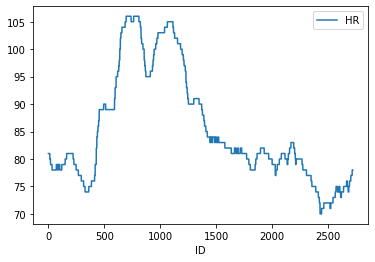

In [4]:
df.plot(x='ID', y='HR')

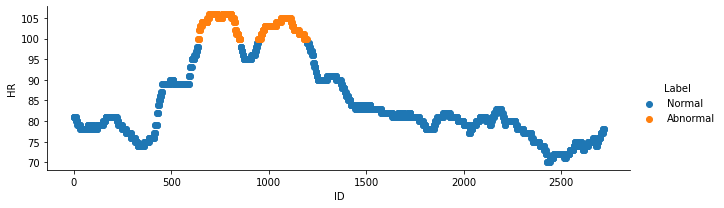

In [5]:
import seaborn as sns
_Label = ['Normal', 'Abnormal']
fg = sns.FacetGrid(data=df, hue='Label', hue_order=_Label, aspect=3)
fg.map(plt.scatter, 'ID', 'HR').add_legend()

In [6]:
df.drop(["Label"],  axis=1)

,ID,HR
0,0,81
1,1,81
2,2,81
3,3,81
4,4,81
...,...,...
2715,2715,78
2716,2716,78
2717,2717,78
2718,2718,78


col = df['ID']
type(col[0])

In [7]:
s = pd.Series(df['HR'])
s = s.diff()

<AxesSubplot:>

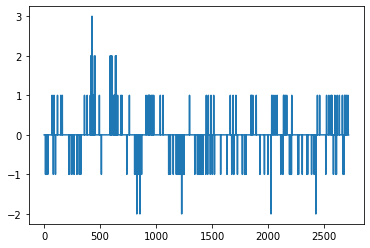

In [8]:
s.plot()
# slow deterioration = -1
# fast deterioration = -2
# slow recovery = 1
#fast recovery = 2

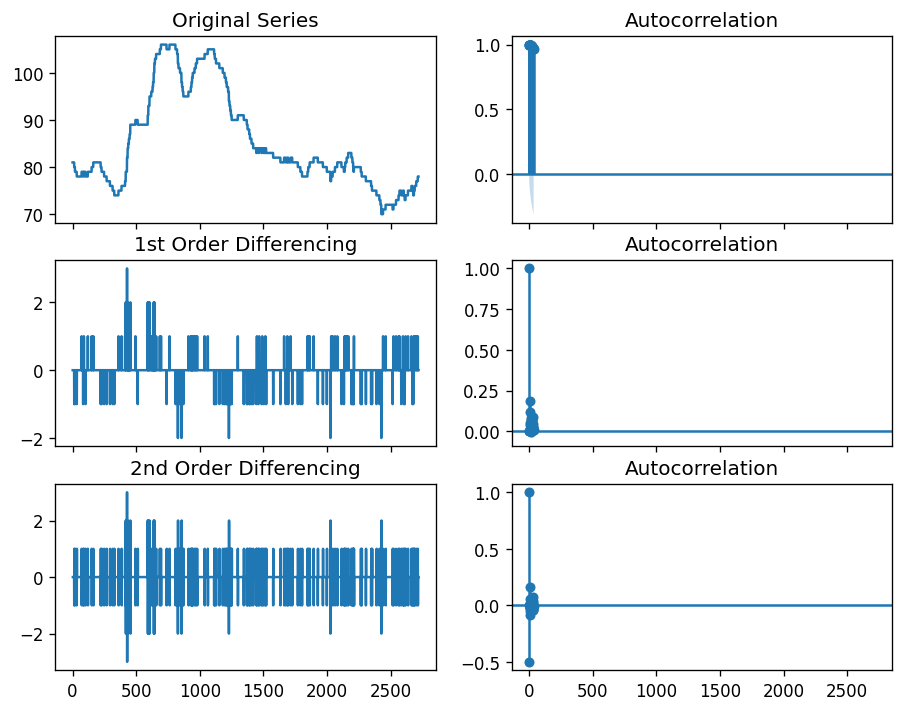

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.HR); axes[0, 0].set_title('Original Series')
plot_acf(df.HR, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.HR.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.HR.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.HR.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.HR.diff().diff().dropna(), ax=axes[2, 1])

plt.show()